In [3]:
!pip install pandas_ta
!pip install keras-tuner
!pip install ipympl


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
import pandas as pd


# Read the CSV file into a pandas DataFrame
data = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
print(data.head(10))




         Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT
5  2006-01-10  26.65  27.02  26.59  27.00   64924946  MSFT
6  2006-01-11  27.01  27.39  26.90  27.29   70123544  MSFT
7  2006-01-12  27.25  27.26  26.97  27.14   45994725  MSFT
8  2006-01-13  27.03  27.25  27.01  27.19   41449046  MSFT
9  2006-01-17  26.90  27.19  26.90  26.99   58574807  MSFT


In [5]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data.Close-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data.Close.shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date','index','Name'], axis=1, inplace=True)
print(data.head(10))

    Open   High    Low        RSI       EMAF       EMAM       EMAS  Target  \
0  24.28  24.48  24.19  58.053286  23.779935  24.372858  25.247867   -0.05   
1  24.39  24.52  24.20  59.376280  23.833274  24.372207  25.235842   -0.05   
2  24.49  24.64  24.34  60.488935  23.891058  24.373550  25.225301    0.09   
3  24.37  24.60  24.34  60.719477  23.945243  24.375262  25.215165    0.00   
4  24.43  24.45  24.20  60.155370  23.991410  24.376346  25.204765    0.01   
5  24.52  24.60  24.35  61.434955  24.042704  24.379388  25.195828    0.07   
6  24.55  24.65  24.44  62.593343  24.097685  24.384153  25.188201    0.09   
7  24.61  24.73  24.47  63.633671  24.155048  24.390407  25.181735    0.00   
8  24.70  24.75  24.61  63.633671  24.206948  24.396538  25.175354    0.74   
9  25.05  25.80  24.98  74.657524  24.357715  24.424131  25.183495    0.46   

   TargetClass  TargetNextClose  
0            0            24.34  
1            0            24.44  
2            1            24.46  
3    

In [6]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,24.28,24.48,24.19,58.053286,23.779935,24.372858,25.247867,-0.05,0,24.34
1,24.39,24.52,24.20,59.376280,23.833274,24.372207,25.235842,-0.05,0,24.44
2,24.49,24.64,24.34,60.488935,23.891058,24.373550,25.225301,0.09,1,24.46
3,24.37,24.60,24.34,60.719477,23.945243,24.375262,25.215165,0.00,0,24.43
4,24.43,24.45,24.20,60.155370,23.991410,24.376346,25.204765,0.01,1,24.53
5,24.52,24.60,24.35,61.434955,24.042704,24.379388,25.195828,0.07,1,24.62
6,24.55,24.65,24.44,62.593343,24.097685,24.384153,25.188201,0.09,1,24.70
7,24.61,24.73,24.47,63.633671,24.155048,24.390407,25.181735,0.00,0,24.70
8,24.70,24.75,24.61,63.633671,24.206948,24.396538,25.175354,0.74,1,25.79
9,25.05,25.80,24.98,74.657524,24.357715,24.424131,25.183495,0.46,1,26.12


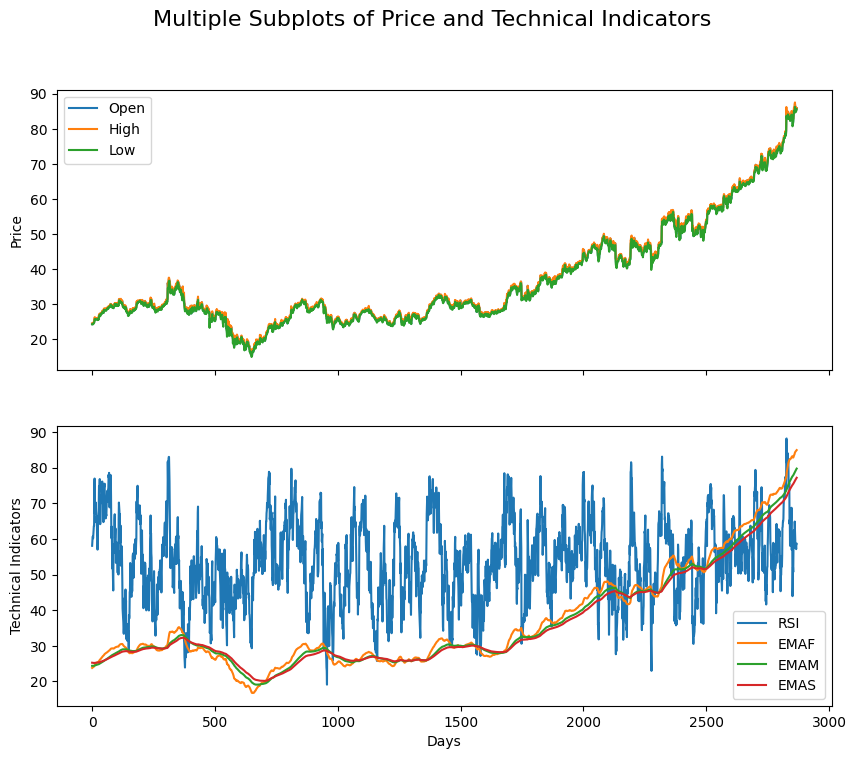

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Multiple Subplots of Price and Technical Indicators', fontsize=16)

axs[0].plot(data_set.Open, label='Open')
axs[0].plot(data_set.High, label='High')
axs[0].plot(data_set.Low, label='Low')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(data_set.RSI, label='RSI')
axs[1].plot(data_set.EMAF, label='EMAF')
axs[1].plot(data_set.EMAM, label='EMAM')
axs[1].plot(data_set.EMAS, label='EMAS')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Technical Indicators')
axs[1].legend()

plt.show()


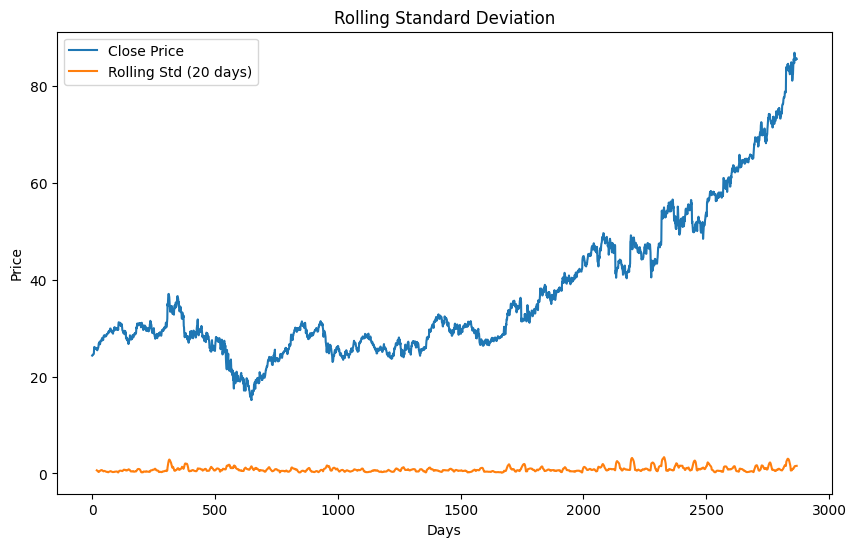

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_set.TargetNextClose, label='Close Price')
ax.plot(data_set.TargetNextClose.rolling(window=20).std(), label='Rolling Std (20 days)')
ax.set_xlabel('Days')
ax.set_ylabel('Price')
ax.legend()
plt.title('Rolling Standard Deviation')
plt.show()


In [9]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.12625139 0.12326099 0.13060538 ... 0.55016722 0.         0.12817294]
 [0.12778087 0.12381747 0.13074552 ... 0.55016722 0.         0.12956764]
 [0.1291713  0.12548692 0.1327074  ... 0.5735786  1.         0.12984658]
 ...
 [0.97483315 0.97259321 0.98318386 ... 0.56856187 1.         0.98410042]
 [0.97956062 0.97885364 0.98584641 ... 0.52842809 0.         0.98423989]
 [0.98303671 0.97815804 0.99047085 ... 0.54347826 0.         0.98172943]]


In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 15
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2869
[[[0.12625139 0.12326099 0.13060538 ... 0.08706426 0.0894977  0.55016722]
  [0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  ...
  [0.14516129 0.14371174 0.14924327 ... 0.08923207 0.08879341 0.5451505 ]
  [0.14766407 0.14245965 0.148963   ... 0.08963571 0.08891709 0.5819398 ]
  [0.14613459 0.14440735 0.15162556 ... 0.09006728 0.0890647  0.57692308]]

 [[0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.12493044 0.1327074  ... 0.08710391 0.08892399 0.55852843]
  ...
  [0.14766407 0.14245965 0.148963   ... 0.08963571 0.08891709 0.5819398 ]
  [0.14613459 0.14440735 0.15162556 ... 0.09006728 0.0890647  0.57692308]
  [0.14794216 0.14440735 0.15162556 ... 0.09052297 0.08923358 0.5451505 ]]

 [[0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.1

In [12]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [13]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2283
(2283, 15, 8)
(571, 15, 8)
(2283, 1)
(571, 1)
[[0.5451505 ]
 [0.55016722]
 [0.53010033]
 ...
 [0.64548495]
 [0.54849498]
 [0.63545151]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, SimpleRNN
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, concatenate
import numpy as np
import tensorflow as tf
import keras
import keras_tuner as kt

np.random.seed(10)

# Define the model builder function
def build_model(hp):
  model = Sequential()
  model.add(SimpleRNN(units=hp.Int('units', min_value=150, max_value=300, step=50), input_shape=(backcandles, 8)))
  model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(Dense(units=hp.Int('dense_units', min_value=1, max_value=100, step=10), activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
               loss='mse', metrics=['mse'])
  return model


# Instantiate the tuner
tuner = kt.BayesianOptimization(
   build_model,
   objective='val_loss',
   max_trials=20,
   executions_per_trial=2,
   directory='my_dir',
   project_name='SL15')

# Run the tuner
tuner.search(x=X_train, y=y_train, epochs=30, validation_split=0.1)


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the model with the best hyperparameters
model = tuner.get_best_models(num_models=1)[0]
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)


Trial 20 Complete [00h 02m 48s]
val_loss: 0.0086781345307827

Best val_loss So Far: 0.008449731394648552
Total elapsed time: 00h 30m 06s
Epoch 1/30
65/65 [==============================] - 3s 24ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/30
65/65 [==============================] - 2s 31ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 3/30
65/65 [==============================] - 2s 35ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 4/30
65/65 [==============================] - 1s 20ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 5/30
65/65 [==============================] - 1s 20ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 6/30
65/65 [==============================] - 1s 20ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 7/30
65/65 [==============================] - 1s 20ms/step - loss: 0.00

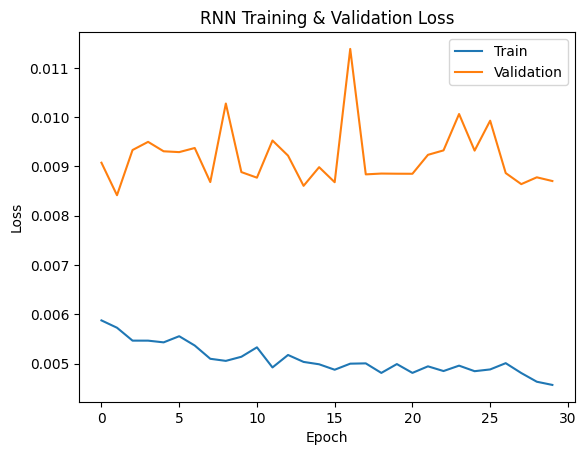

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [16]:
tuner.results_summary(num_trials=20)

Results summary
Results in my_dir/SL15
Showing 20 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
units: 300
dropout: 0.1
dense_units: 41
learning_rate: 0.0001
Score: 0.008449731394648552

Trial 11 summary
Hyperparameters:
units: 200
dropout: 0.1
dense_units: 51
learning_rate: 0.0001
Score: 0.008611712139099836

Trial 05 summary
Hyperparameters:
units: 250
dropout: 0.1
dense_units: 81
learning_rate: 0.001
Score: 0.008612404111772776

Trial 10 summary
Hyperparameters:
units: 300
dropout: 0.30000000000000004
dense_units: 61
learning_rate: 0.0001
Score: 0.008626974653452635

Trial 09 summary
Hyperparameters:
units: 150
dropout: 0.1
dense_units: 61
learning_rate: 0.01
Score: 0.008627763018012047

Trial 03 summary
Hyperparameters:
units: 250
dropout: 0.0
dense_units: 31
learning_rate: 0.001
Score: 0.00863155210390687

Trial 06 summary
Hyperparameters:
units: 200
dropout: 0.30000000000000004
dense_units: 91
learning_rate: 0.01
Score: 0.0086390599608

In [17]:
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import Dense
# from keras.layers import TimeDistributed
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Input, Activation, SimpleRNN
# from keras import optimizers
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import keras
# from keras import optimizers
# from keras.callbacks import History
# from keras.models import Model
# from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
# import numpy as np
# #tf.random.set_seed(20)
# np.random.seed(10)

# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# inputs = SimpleRNN(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# model.compile(optimizer=adam, loss='mse')

# # Add the History callback to track training metrics
# history = History()

# model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1, callbacks=[history])

# # Plot the training and validation loss over epochs
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss over Epochs')
# plt.legend()
# plt.show()

In [18]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 0s 13ms/step
[0.5556645] [0.46822742]
[0.58342147] [0.46822742]
[0.5835366] [0.57023411]
[0.5782886] [0.62207358]
[0.5923436] [0.53511706]
[0.58152366] [0.77591973]
[0.56818897] [0.70735786]
[0.55893695] [0.62876254]
[0.5662708] [0.5083612]
[0.54784924] [0.70735786]


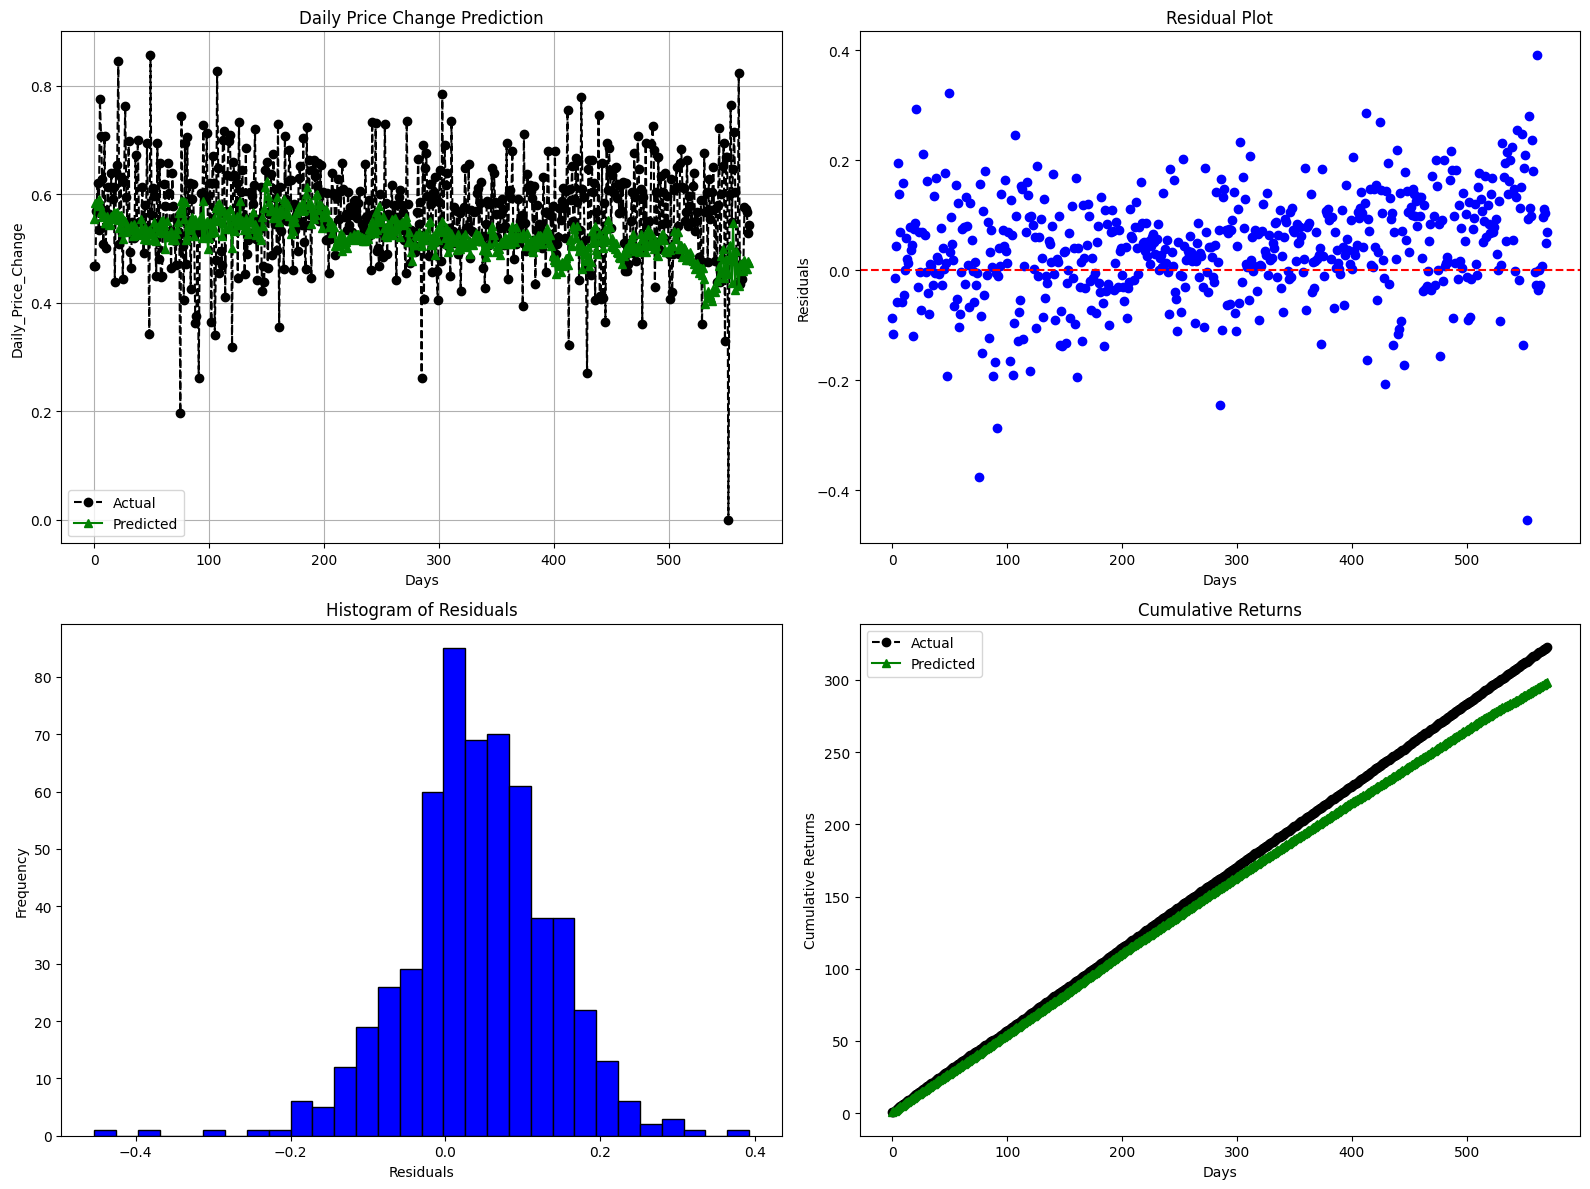

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


# Assuming y_test and y_pred are NumPy arrays or lists
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

residuals = y_test - y_pred

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs. Predicted
axs[0, 0].plot(y_test, color='black', label='Actual', linestyle='--', marker='o')
axs[0, 0].plot(y_pred, color='green', label='Predicted', linestyle='-', marker='^')
axs[0, 0].set_title('Daily Price Change Prediction')
axs[0, 0].set_ylabel('Daily_Price_Change')
axs[0, 0].set_xlabel('Days')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Residual Plot
axs[0, 1].plot(residuals, color='blue', linestyle='', marker='o')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title('Residual Plot')
axs[0, 1].set_xlabel('Days')
axs[0, 1].set_ylabel('Residuals')

# Plot 3: Histogram of Residuals
axs[1, 0].hist(residuals, bins=30, color='blue', edgecolor='black')
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Cumulative Returns
cumulative_returns_actual = np.cumsum(y_test)
cumulative_returns_pred = np.cumsum(y_pred)

axs[1, 1].plot(cumulative_returns_actual, label='Actual', color='black', linestyle='--', marker='o')
axs[1, 1].plot(cumulative_returns_pred, label='Predicted', color='green', linestyle='-', marker='^')
axs[1, 1].set_title('Cumulative Returns')
axs[1, 1].set_xlabel('Days')
axs[1, 1].set_ylabel('Cumulative Returns')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


1. **Actual vs. Predicted Plot**: This plot shows the actual values (y_test) against the predicted values (y_pred). Each point represents a day, and the line plot helps visualize the overall trend of the predictions. The black dashed line represents the actual values, and the green solid line represents the predicted values. This plot allows us to visually assess how well our model is predicting the daily price changes.

2. **Residual Plot**: A residual plot shows the difference between the observed and predicted values (residuals). If the model's assumptions hold true, the residuals should be randomly scattered around zero. In this case, the blue markers represent the residuals, and the red dashed line represents zero. This plot helps identify any systematic bias in the model.

3. **Histogram of Residuals**: This plot provides a frequency distribution of the residuals. The blue bars represent the frequency of each residual value. This plot can provide additional insights into the distribution of residuals, which can be useful in diagnosing potential issues with the model.

4. **Cumulative Returns Plot**: This plot shows the cumulative sum of the actual and predicted returns over time. The black dashed line represents the actual cumulative returns, and the green solid line represents the predicted cumulative returns. This plot can give us a sense of how much the portfolio would have grown if we had followed the predictions instead of the actual values.